# Article Summarizer using NLP

### Importing the required Libraries

In [575]:
import numpy as np
import pandas as pd
import warnings
import re
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import string
from string import punctuation
from nltk.corpus import stopwords
from statistics import mean
from heapq import nlargest
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))
punctuation = punctuation + '\n' + '—' + '“' + ',' + '”' + '‘' + '-' + '’'
warnings.filterwarnings('ignore')

In [576]:
# Importing the dataset
df = pd.read_csv("all-the-news-2-1.csv")

In [577]:
df.head()

,Unnamed: 0,Unnamed: 0.1,date,year,month,day,author,title,article,url,section,publication
0,0,0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,1,1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2,2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,3,3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,4,4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ


In [578]:
# Shape of the dataset
print ("The shape of the dataset : ", df.shape)

The shape of the dataset :  (2688879, 12)


In [579]:
# Dropping the unnecessary columns
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
df.head()

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ


In [580]:
df['article'][0]

'This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you,\xa0It\'s probably nothing, but these could be signs of a coming heart attack. You push for more certainty, but the doctor tells you she\'s not sure. The human body is a complex system. You\'re young and otherwise pretty healthy. There could be plenty of other explanations for what you\'re feeling. But it is a little worrying. So just to be on the safe side, maybe you should reduce the stress in your life and eat a healthier diet. What would you do? If you\'re a sensible person, you\'d probably err on the side of precaution. Sure, it might be no

### Exploratory Data Analysis

In [581]:
df.head()

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ


In [582]:
# Replacing the unnecessary row value of year with it's actual values
df['year'] = df['year'].replace("https://www.washingtonpost.com/outlook/tale-of-a-woman-who-died-and-a-woman-who-killed-in-the-northern-ireland-conflict/2019/03/08/59e75dd4-2ecd-11e9-8ad3-9a5b113ecd3c_story.html", 2019)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Distribution of the articles according to the year')]

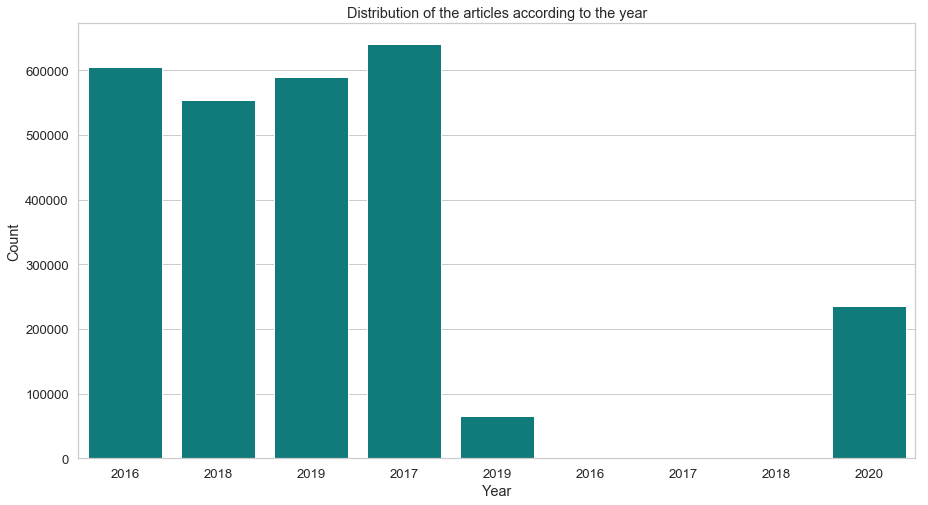

In [584]:
# Countplot shows the distribution of the articles according to the year
plt.rcParams['figure.figsize'] = [15, 8]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_year = sns.countplot(df['year'], color = 'darkcyan')
sns_year.set(xlabel = "Year", ylabel = "Count", title = "Distribution of the articles according to the year")

In [585]:
# Authors
df['author'].value_counts()[0:100]

WIRED Staff             15815
Field Level Media        7930
Associated Press         7428
John Bowden              7021
The Associated Press     6344
                        ...  
Emily Birnbaum           1839
Anthony Ha               1810
Haley Britzky            1796
Michael Hafford          1791
Ashley Carman            1765
Name: author, Length: 100, dtype: int64

In [586]:
# Changing the value "The Associated Press" to "Associated Press"
df['author'] = df['author'].replace("The Associated Press", "Associated Press")

In [587]:
# Top 100 authors
df['author'].value_counts()[0:100]

WIRED Staff          15815
Associated Press     13772
Field Level Media     7930
John Bowden           7021
Rebecca Savransky     5822
                     ...  
Anthony Ha            1810
Haley Britzky         1796
Michael Hafford       1791
Ashley Carman         1765
Suzannah Weiss        1752
Name: author, Length: 100, dtype: int64

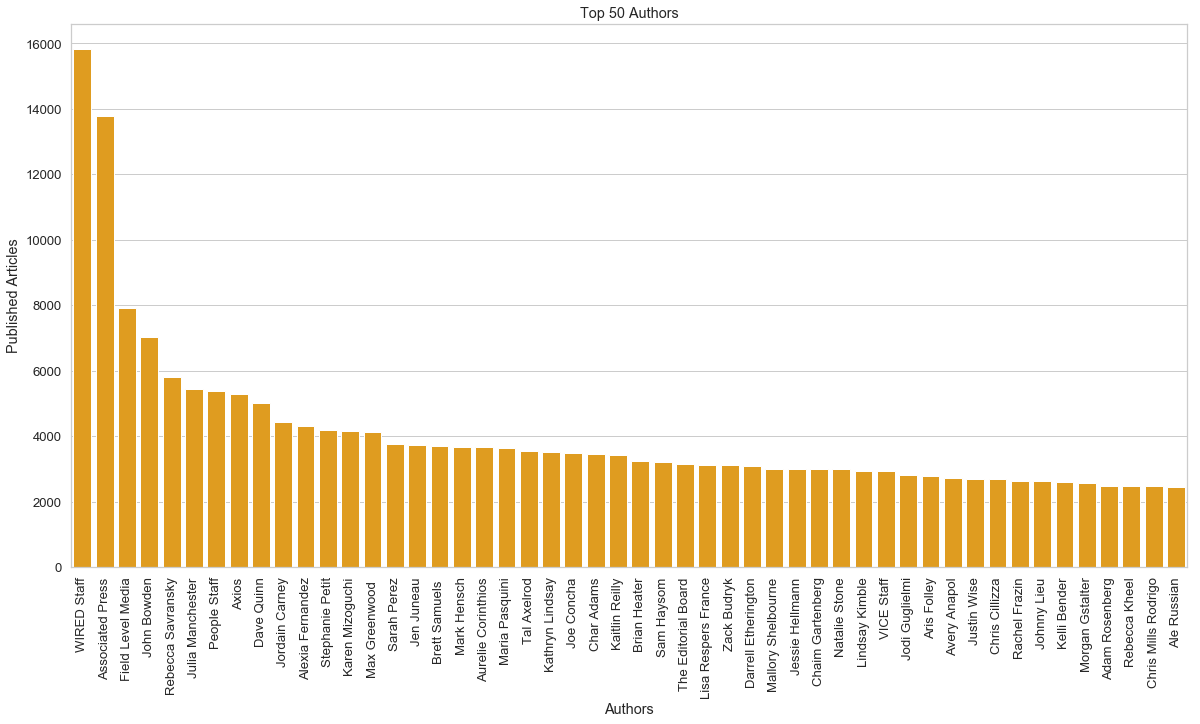

In [589]:
# Barplot showing the top 50 Authors
plt.rcParams['figure.figsize'] = [20, 10]
author_count = df['author'].value_counts()[0:50]
author_top_50 = sns.barplot(x = list(author_count.index), y = (author_count.values), color = 'orange')
author_top_50.set(xlabel = "Authors", ylabel = "Published Articles", title = "Top 50 Authors")
plt.setp(author_top_50.get_xticklabels(), rotation = 90);

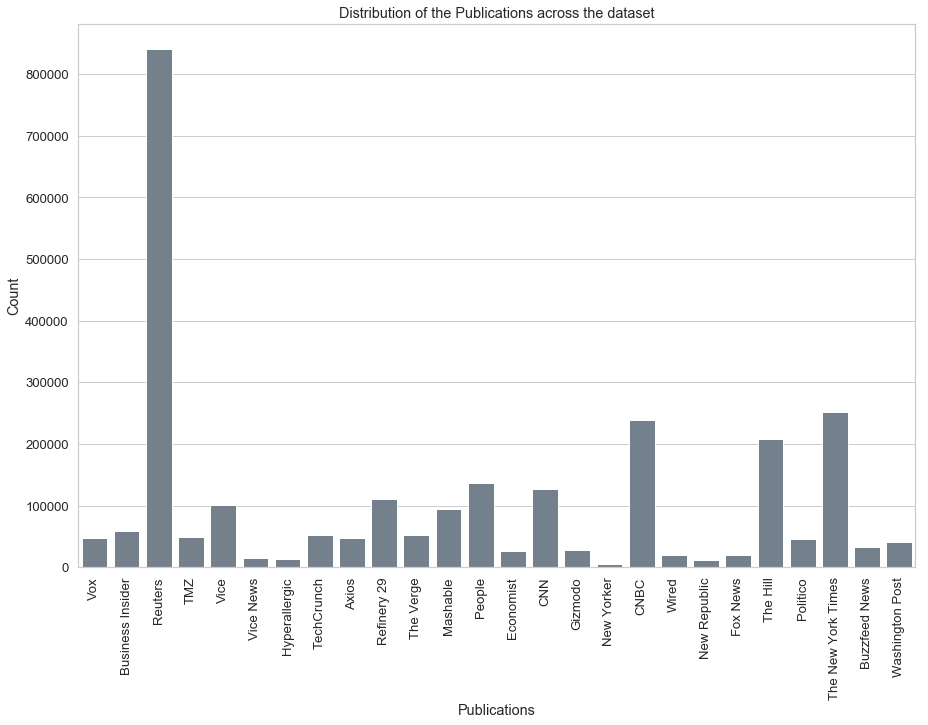

In [590]:
# Countplot shows the distribution of the Publications
plt.rcParams['figure.figsize'] = [15, 10]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_pub = sns.countplot(df['publication'], color = 'slategrey')
sns_pub.set(xlabel = "Publications", ylabel = "Count", title = "Distribution of the Publications across the dataset")
plt.setp(sns_pub.get_xticklabels(), rotation = 90);

### Making the Article Summarizer

In [591]:
contractions_dict = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"doesn’t": "does not",
"don't": "do not",
"don’t": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y’all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"’cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": "he had",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"i’d": "i would",
"i’d’ve": "i would have",
"i’ll": "i will",
"i’ll’ve": "i will have",
"i’m": "i am",
"i’ve": "i have",
"isn’t": "is not",
"it’d": "it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that is",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who is",
"who’ve": "who have",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’re": "you are",
"you’ve": "you have",
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [592]:
# Function to clean the html from the article
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

# Function expand the contractions if there's any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

# Function to preprocess the articles
def preprocessing(article):
    global article_sent
    
    # Converting to lowercase
    article = article.str.lower()
    
    # Removing the HTML
    article = article.apply(lambda x: cleanhtml(x))
    
    # Removing the email ids
    article = article.apply(lambda x: re.sub('\S+@\S+','', x))
    
    # Removing The URLS
    article = article.apply(lambda x: re.sub("((http\://|https\://|ftp\://)|(www.))+(([a-zA-Z0-9\.-]+\.[a-zA-Z]{2,4})|([0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}))(/[a-zA-Z0-9%:/-_\?\.'~]*)?",'', x))
    
    # Removing the '\xa0'
    article = article.apply(lambda x: x.replace("\xa0", " "))
    
    # Removing the contractions
    article = article.apply(lambda x: expand_contractions(x))
    
    # Stripping the possessives
    article = article.apply(lambda x: x.replace("'s", ''))
    article = article.apply(lambda x: x.replace('’s', ''))
    article = article.apply(lambda x: x.replace("\'s", ''))
    article = article.apply(lambda x: x.replace("\’s", ''))
    
    # Removing the Trailing and leading whitespace and double spaces
    article = article.apply(lambda x: re.sub(' +', ' ',x))
    
    # Copying the article for the sentence tokenization
    article_sent = article.copy()
    
    # Removing punctuations from the article
    article = article.apply(lambda x: ''.join(word for word in x if word not in punctuation))
    
    # Removing the Trailing and leading whitespace and double spaces again as removing punctuation might
    # Lead to a white space
    article = article.apply(lambda x: re.sub(' +', ' ',x))
    
    # Removing the Stopwords
    article = article.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
    
    return article

# Function to normalize the word frequency which is used in the function word_frequency
def normalize(li_word):
    global normalized_freq
    normalized_freq = []
    for dictionary in li_word:
        max_frequency = max(dictionary.values())
        for word in dictionary.keys():
            dictionary[word] = dictionary[word]/max_frequency
        normalized_freq.append(dictionary)
    return normalized_freq

# Function to calculate the word frequency
def word_frequency(article_word):
    word_frequency = {}
    li_word = []
    for sentence in article_word:
        for word in word_tokenize(sentence):
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
        li_word.append(word_frequency)
        word_frequency = {}
    normalize(li_word)
    return normalized_freq

# Function to Score the sentence which is called in the function sent_token
def sentence_score(li):
    global sentence_score_list
    sentence_score = {}
    sentence_score_list = []
    for list_, dictionary in zip(li, normalized_freq):
        for sent in list_:
            for word in word_tokenize(sent):
                if word in dictionary.keys():
                    if sent not in sentence_score.keys():
                        sentence_score[sent] = dictionary[word]
                    else:
                        sentence_score[sent] += dictionary[word]
        sentence_score_list.append(sentence_score)
        sentence_score = {}
    return sentence_score_list

# Function to tokenize the sentence
def sent_token(article_sent):
    sentence_list = []
    sent_token = []
    for sent in article_sent:
        token = sent_tokenize(sent)
        for sentence in token:
            token_2 = ''.join(word for word in sentence if word not in punctuation)
            token_2 = re.sub(' +', ' ',token_2)
            sent_token.append(token_2)
        sentence_list.append(sent_token)
        sent_token = []
    sentence_score(sentence_list)
    return sentence_score_list

# Function which generates the summary of the articles (This uses the 20% of the sentences with the highest score)
def summary(sentence_score_OwO):
    summary_list = []
    for summ in sentence_score_OwO:
        select_length = int(len(summ)*0.25)
        summary_ = nlargest(select_length, summ, key = summ.get)
        summary_list.append(".".join(summary_))
    return summary_list

# This Function can be used to generate the summary which uses the mean sentence score
#def summary(sentence_score_OwO):
#    summary_list = []
#    li_sen = []
#    for summ in sentence_score_OwO:
#        for sent, score in summ.items():
#            threshold_score = mean(list(summ.values()))
#            if score >= threshold_score:
#                li_sen.append(sent)
#            else:
#                continue
#        sugoi = ', '.join(li_sen)
#        summary_list.append(sugoi)
#        li_sen = []
#    return summary_list

# Functions to change the article string (if passed) to change it to generate a pandas series
def make_series(art):
    global dataframe
    data_dict = {'article' : [art]}
    dataframe = pd.DataFrame(data_dict)['article']
    return dataframe

# Function which is to be called to generate the summary which in further calls other functions alltogether
def article_summarize(artefact):
    
    if type(artefact) != pd.Series:
        artefact = make_series(artefact)
    
    df = preprocessing(artefact)
    
    word_normalization = word_frequency(df)
    
    sentence_score_OwO = sent_token(article_sent)
    
    summarized_article = summary(sentence_score_OwO)
    
    return summarized_article

In [593]:
# Generating the Word Cloud of the article using the preprocessing and make_series function mentioned below
def word_cloud(art):
    art_ = make_series(art)
    OwO = preprocessing(art_)
    wordcloud_ = WordCloud(height = 500, width = 1000, background_color = 'white').generate(art)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis('off');

In [595]:
# Generating the summaries for the first 100 articles
summaries = article_summarize(df['article'][0:100])

### Examples

In [596]:
print ("The Actual length of the article is : ", len(df['article'][0]))
df['article'][0]

The Actual length of the article is :  6499


'This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you,\xa0It\'s probably nothing, but these could be signs of a coming heart attack. You push for more certainty, but the doctor tells you she\'s not sure. The human body is a complex system. You\'re young and otherwise pretty healthy. There could be plenty of other explanations for what you\'re feeling. But it is a little worrying. So just to be on the safe side, maybe you should reduce the stress in your life and eat a healthier diet. What would you do? If you\'re a sensible person, you\'d probably err on the side of precaution. Sure, it might be no

In [597]:
print ("The length of the summarized article is : ", len(summaries[0]))
summaries[0]

The length of the summarized article is :  2989


'in my heart attack parable if the doctor had told you that the only way to prevent a future heart attack would be to give up your job and your social life and spend the next year on strict bed rest eating only kale and chia seed salads you might want to be a little more certain that you really were at high risk for a heart attack.i offer this parable as a way of thinking about the debate that is emerged over the past two weeks in response to amanda taub new york times article profiling new findings by roberto stefan foa and yascha mounk findings that raise alarms about the fact that younger people have over time become less and less likely to say in surveys that it is essential to live in a democracy.in deciding how seriously to take these findings it is also worth asking what we would do differently if we took foa and mounk findings seriously.we might also try to figure out ways to make our public institutions do more outreach to citizens to make sure they feel engaged in their democ

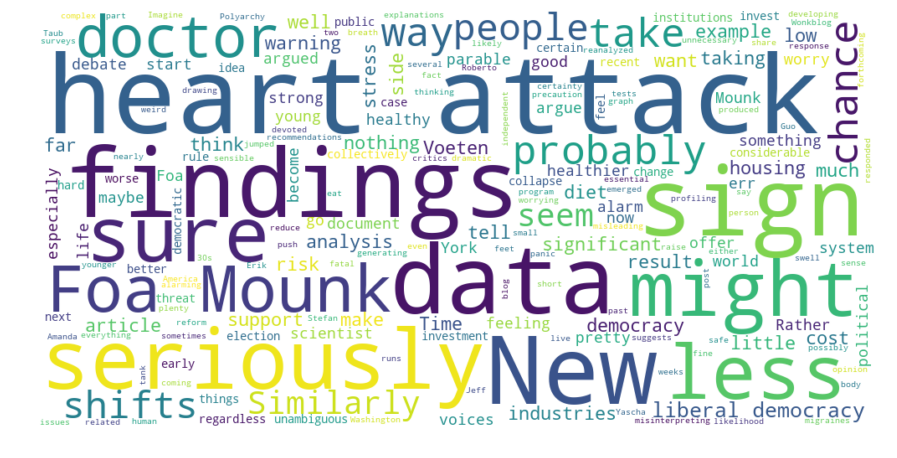

In [598]:
word_cloud(df['article'][0])

In [599]:
print ("The Actual length of the article is : ", len(df['article'][1]))
df['article'][1]

The Actual length of the article is :  1602


" The Indianapolis Colts made Andrew Luck the highest-paid player in NFL history this offseason with a five-year, $122-million contract with $89 million guaranteed. However, they're already finding that Luck's contract is inhibiting their ability to address weaknesses on other parts of the roster, particularly on defense. On Friday, Colts GM Ryan Grigson, who is under fire for the Colts 1-3 start, said that it's difficult to build up the team's defense with Luck making so much money. According to Keefer, Grigson did point out that the Colts still have young talent they're hoping to develop on defense. However, blaming Luck's contract — which the Colts gave him — for having a weak defense (30th in defensive DVOA) is not accurate. As others have pointed out, last year's Denver Broncos paid Peyton Manning $15 million in base salary while also boasting an elite defense. Luck also takes up $18.4 million against the salary cap this year, less than $1 million more than Manning did a year ago 

In [600]:
print ("The length of the summarized article is : ", len(summaries[1]))
summaries[1]

The length of the summarized article is :  379


'on friday colts gm ryan grigson who is under fire for the colts 13 start said that it is difficult to build up the team defense with luck making so much money.it is certainly possible to build a good defense with a highpaid quarterback but if the colts felt that paying luck such a high sum of money would be difficult perhaps they should have reconsidered what the final numbers'

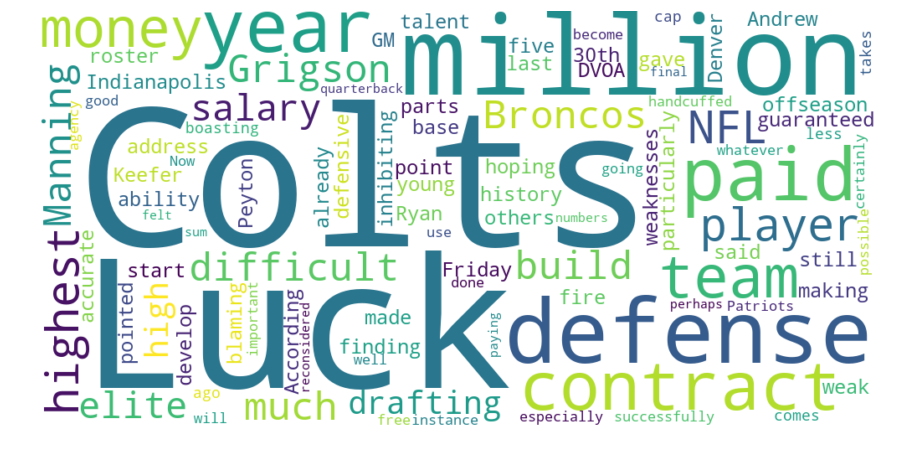

In [601]:
word_cloud(df['article'][1])

In [602]:
print ("The Actual length of the article is : ", len(df['article'][99]))
df['article'][99]

The Actual length of the article is :  3477


'Harvey Weinstein has been fired from the company he co-founded. Matt Lauer is gone from NBC. Mario Batali has stepped away from his restaurants. What was striking about putting together a list of people who have been publicly accused of sexual misconduct in recent months was not necessarily the prevalence of the problem — unfortunately, women and gender-nonconforming people have long been aware of the sheer ubiquity of sexual harassment and violence. What was surprising — what felt new about this time in American history — was that of 105 people Vox included on the list, more than 50 have faced legal or professional consequences, from job suspensions to jail time. It’s too soon to tell what the long-term impact of #MeToo will be, but in a number of individual cases, it has produced swift action. And yet perhaps the most powerful man on the list — President Donald Trump — so far has avoided any consequences at all. Trump has been accused of sexual harassment, assault, or other miscondu

In [603]:
print ("The length of the summarized article is : ", len(summaries[99]))
summaries[99]

The length of the summarized article is :  1742


'trump has been accused of sexual harassment assault or other misconduct by more than a dozen women and has been caught on tape bragging that when you are a star women let you grab em by the pussy despite all this he remains the country chief executive and commanderinchief and his press secretary has brushed aside the allegations against him by saying the people of this country at a decisive election supported president trump there are many reasons trump has not faced the same consequences as weinstein and others starting with the fact that republicans in congress and voters chose to support him despite women reports that he had harassed or assaulted them.trump lawyers are fighting a defamation lawsuit by summer zervos who says trump kissed and touched her without her consent in 2007 her lawyers have subpoenaed all trump campaign documents relating to any woman alleging that donald j trump touched her inappropriately if that suit makes it to the discovery phase the american people coul

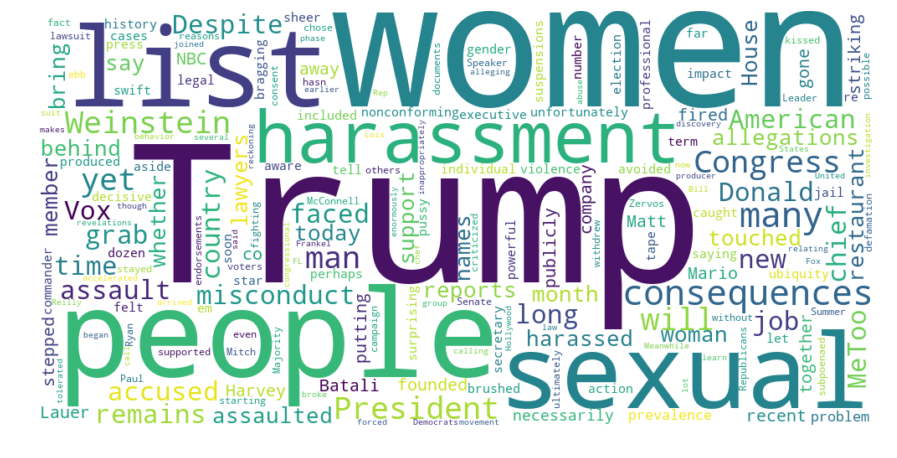

In [604]:
word_cloud(df['article'][99])